# Autocorrelation and Partial autocorrelation

### After applying the mathematical transformations discussed in the previous section, we will often be left with what is known as a stationary (or weakly stationary) time series, which is characterized by a constant mean E(xt) and correlation that depends only on the time lag between two time steps, but independent of the value of the time step. 

### This type of covariance is the key in time series analysis and is called autocovariance or autocorrelation when normalized to the range of -1 to 1. 

### Autocorrelation is therefore expressed as the second order moment E(xt,xt+h) = g(h) that evidently is a function of only the time lag h and independent of the actual time index t. 

### This special definition of autocorrelation ensures that it is a time-independent property and hence can be reliably used for making inference about future realization of the time series.

### Autocorrelation reflects the degree of linear dependency between the time series at index t and the time series at indices t-h or t+h. A positive autocorrelation indicates that the present and future values of the time series move in the same direction, whereas negative values means that present and future values move in the opposite direction. 

### If autocorrelation is close to zero, temporal dependencies within the series may be hard to find. Because of this property, autocorrelation is useful in predicting the future state of a time series at h time steps ahead.

### Presence of autocorrelation can be identified by plotting the observed values of the autocorrelation function (ACF) for a given time series. This plot is commonly referred as the ACF plot. Let us illustrate how plotting the observed values of the ACF can help in detecting presence of autocorrelation.

In [2]:
import os
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [3]:
os.chdir('/home/ishta/Analyzing-and-predicting-the-volatile-market-patterns-for-trading/Notebooks_time_series')

In [4]:
data = pd.read_csv('Datasets/eurusd_minute.csv')

In [5]:
print('Column names:', data.columns)

Column names: Index(['Date', 'Time', 'BO', 'BH', 'BL', 'BC', 'BCh', 'AO', 'AH', 'AL', 'AC',
       'ACh'],
      dtype='object')


In [36]:
# Assuming 'Date' and 'Time' columns are in datetime format
if 'Date' in data.columns and 'Time' in data.columns:
    data['DateTime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])
    data.set_index('DateTime', inplace=True)

# Define the time range
start_time = '2005-01-17 00:00:00'
end_time = '2005-01-21 00:00:00'

# Extract rows within the specified time range
selected_rows = data.loc[start_time:end_time].copy()  # Ensure you have a copy

# Drop rows with empty points (NaN values)
selected_rows.dropna(inplace=True)

# Reset the index if needed
selected_rows.reset_index(inplace=True)

#Change the row indices of the dataframe using the Date column
selected_rows.index = selected_rows['DateTime']

In [37]:
print('Column names:', selected_rows.columns)

Column names: Index(['DateTime', 'Date', 'Time', 'BO', 'BH', 'BL', 'BC', 'BCh', 'AO', 'AH',
       'AL', 'AC', 'ACh'],
      dtype='object')


In [38]:
selected_rows

,DateTime,Date,Time,BO,BH,BL,BC,BCh,AO,AH,AL,AC,ACh
DateTime,,,,,,,,,,,,,
2005-01-17 00:00:00,2005-01-17 00:00:00,2005-01-17,0:0,1.3093,1.3093,1.3093,1.3093,0.0000,1.3103,1.3103,1.3103,1.3103,0.0000
2005-01-17 00:01:00,2005-01-17 00:01:00,2005-01-17,0:1,1.3093,1.3094,1.3092,1.3094,-0.0001,1.3103,1.3104,1.3102,1.3104,-0.0001
2005-01-17 00:02:00,2005-01-17 00:02:00,2005-01-17,0:2,1.3093,1.3097,1.3093,1.3096,-0.0003,1.3103,1.3107,1.3103,1.3106,-0.0003
2005-01-17 00:03:00,2005-01-17 00:03:00,2005-01-17,0:3,1.3096,1.3099,1.3094,1.3094,0.0002,1.3106,1.3109,1.3104,1.3104,0.0002
2005-01-17 00:04:00,2005-01-17 00:04:00,2005-01-17,0:4,1.3093,1.3098,1.3093,1.3096,-0.0003,1.3103,1.3108,1.3103,1.3106,-0.0003
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-01-20 23:56:00,2005-01-20 23:56:00,2005-01-20,23:56,1.2956,1.2956,1.2955,1.2955,0.0001,1.2958,1.2958,1.2957,1.2957,0.0001
2005-01-20 23:57:00,2005-01-20 23:57:00,2005-01-20,23:57,1.2955,1.2960,1.2955,1.2960,-0.0005,1.2957,1.2962,1.2957,1.2962,-0.0005
2005-01-20 23:58:00,2005-01-20 23:58:00,2005-01-20,23:58,1.2957,1.2961,1.2956,1.2959,-0.0002,1.2959,1.2963,1.2958,1.2961,-0.0002


In [54]:
#We would be using the 'BC' values to illustrate Differencing
first_order_diff = selected_rows['BC'].diff(3)

# Drop rows with empty points (NaN values)
first_order_diff.dropna(inplace=True)

In [55]:
first_order_diff

DateTime
2005-01-17 00:03:00    0.0001
2005-01-17 00:04:00    0.0002
2005-01-17 00:05:00   -0.0002
2005-01-17 00:06:00    0.0000
2005-01-17 00:07:00   -0.0001
                        ...  
2005-01-20 23:56:00    0.0000
2005-01-20 23:57:00    0.0004
2005-01-20 23:58:00    0.0004
2005-01-20 23:59:00    0.0006
2005-01-21 00:00:00   -0.0002
Name: BC, Length: 5406, dtype: float64

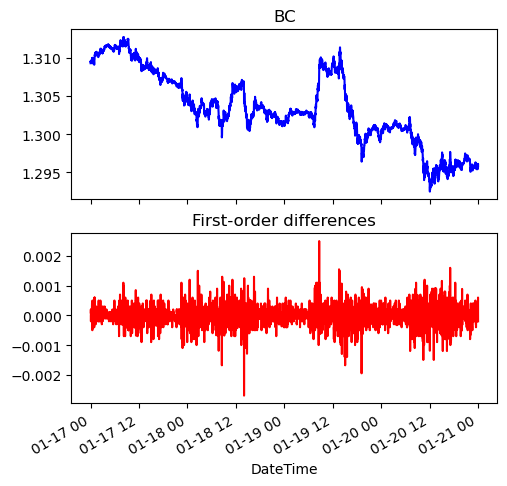

In [60]:
#Let us plot the original time series and first-differences
fig, ax = plt.subplots(2, sharex=True)
fig.set_size_inches(5.5, 5.5)
selected_rows['BC'].plot(ax=ax[0], color='b')
ax[0].set_title('BC')
first_order_diff.plot(ax=ax[1], color='r')
ax[1].set_title('First-order differences')
plt.savefig('plots/ch2/B07887_02_06.png', format='png', dpi=300)

In [61]:
from statsmodels.tsa.stattools import adfuller

# Check for stationarity
result = adfuller(first_order_diff)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# If p-value is greater than a significance level (e.g., 0.05), the series is not stationary

ADF Statistic: -11.452207061640317
p-value: 5.821135116909349e-21


In [64]:
lag = range(0, 31)
first_order_diff_acf = []

for l in lag:
    first_order_diff_acf.append(first_order_diff.autocorr(l))

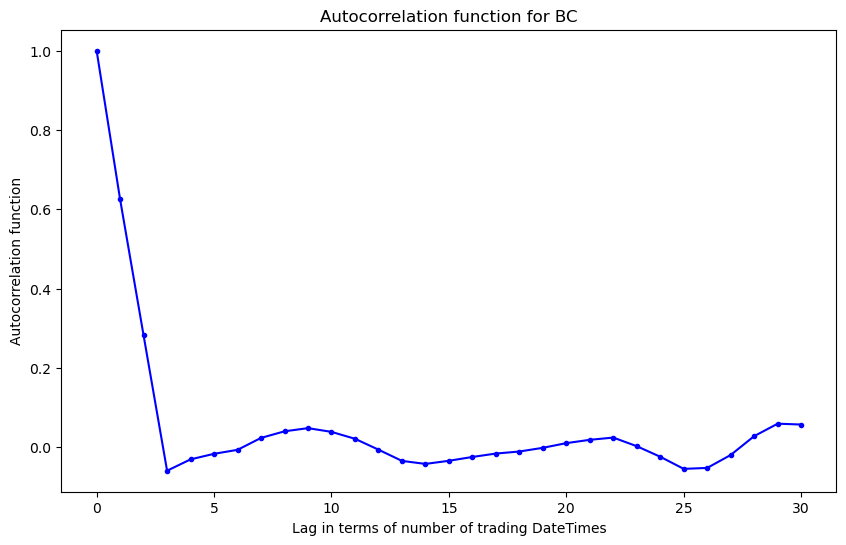

In [65]:
plt.figure(figsize=(10, 6))
plt.plot(first_order_diff_acf, marker='.', color='b')
plt.title('Autocorrelation function for BC')
plt.xlabel('Lag in terms of number of trading DateTimes')
plt.ylabel('Autocorrelation function')
plt.savefig('plots/ch1/B07887_01_15.png', format='png', dpi=300)

We have written a for-loop to calculate the autocorrelation at different lags and plotted the
results using the sns.pointplot function. Alternatively, the plot_acf function of
statsmodels.graphics.tsaplots to compute and plot the autocorrelation at various
lags. 

Additionally, this function also plots the 95% confidence intervals. Autocorrelation
outside these confidence intervals is statistically significant correlation while those which
are inside the confidence intervals are due to random noise.
The autocorrelation and confidence intervals generated by the plot_acf is shown in the
following figure:

<Figure size 550x550 with 0 Axes>

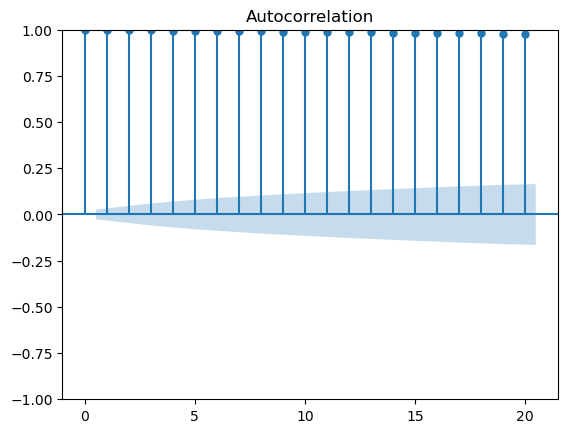

In [66]:
#Plot autocorrelation and confidence intervals using the plot_acf function
plt.figure(figsize=(5.5, 5.5))
plot_acf(selected_rows['BC'], lags=20)
plt.savefig('plots/ch1/B07887_01_16.png', format='png', dpi=300)

### So far, we have discussed autocorrelation which is a measure of linear dependency between variables x_t and x_(t+h). 

### Autoregressive (AR) models captures this dependency as a linear regression between the x_(t+h) and x_t. However, time series tend to carry information and dependency structures in steps and therefore autocorrelation at lag h is also influenced by the intermediate variables x_t, x_(t+1)…x_(t+h-1). Therefore, autocorrelation is not the correct measure of the mutual correlation between x_t and x_(t+h) in the presence of the intermediate variables. 

### Hence, it would erroneous to choose h in AR models based on autocorrelation. 

### Partial autocorrelation solves this problem by measuring the correlation between x_t and x_(t+h) when the influence of the intermediate variables has been removed. Hence partial autocorrelation in time series analysis defines the correlation between x_t and x_(t+h) which is not accounted for by lags t+1 to t+h-1.

### Partial autocorrelation helps in identifying the order h of an AR(h) model.

### The first partial autocorrelation at lag zero is always 1.0. As seen in the preceding figure, the partial autocorrelation only at lag one is statistically significant while for rest the lags it is within the 95% confidence intervals. 

<Figure size 550x550 with 0 Axes>

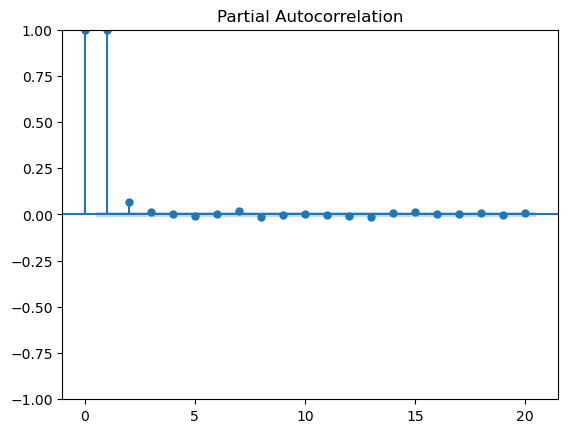

In [31]:
#Plot autocorrelation and confidence intervals using the plot_acf function
plt.figure(figsize=(5.5, 5.5))
plot_pacf(selected_rows['BC'], lags=20)
plt.savefig('plots/ch1/B07887_01_17.png', format='png', dpi=300)

/home/ishta/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ishta/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ishta/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ishta/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stati

Mean Squared Error: 2.4725074701140145e-05
Root Mean Squared Error: 0.004972431467716789


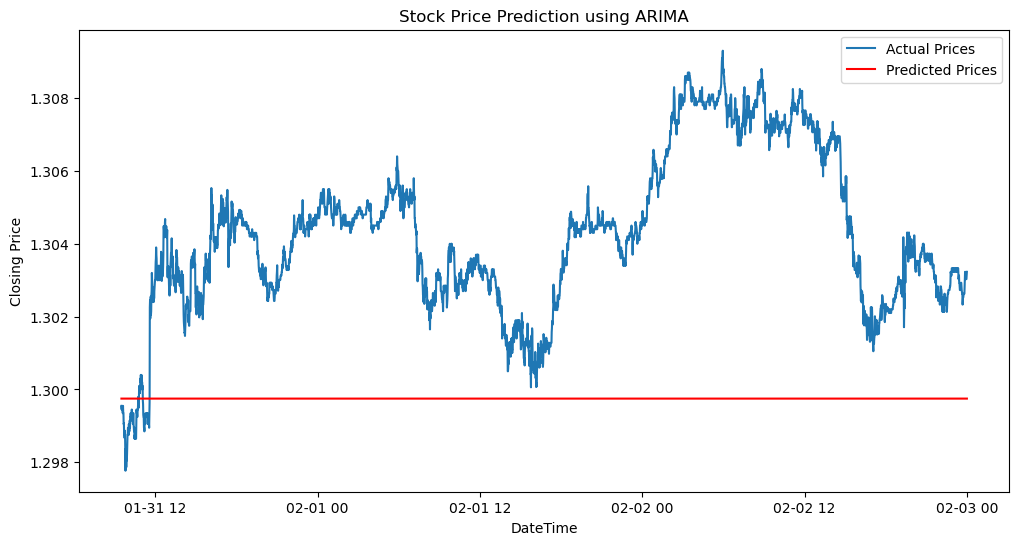

In [32]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

# Split the data into training and testing sets
train_size = int(len(selected_rows) * 0.8)
train, test = selected_rows[:train_size], selected_rows[train_size:]

# Fit ARIMA model
order = (5, 1, 5)  # You may need to adjust these parameters based on your data
model = ARIMA(train['BC'], order=order)
model_fit = model.fit()

# Predict future prices
predictions = model_fit.forecast(steps=len(test))

# Evaluate the model
mse = mean_squared_error(test['BC'], predictions)
rmse = np.sqrt(mse)
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

# Plot actual vs predicted prices
plt.figure(figsize=(12, 6))
plt.plot(test.index, test['BC'], label='Actual Prices')
plt.plot(test.index, predictions, label='Predicted Prices', color='red')
plt.title('Stock Price Prediction using ARIMA')
plt.xlabel('DateTime')
plt.ylabel('Closing Price')
plt.legend()
plt.show()